### lesson 7
OpenCVを使用した色抽出と画像上の座標の計算

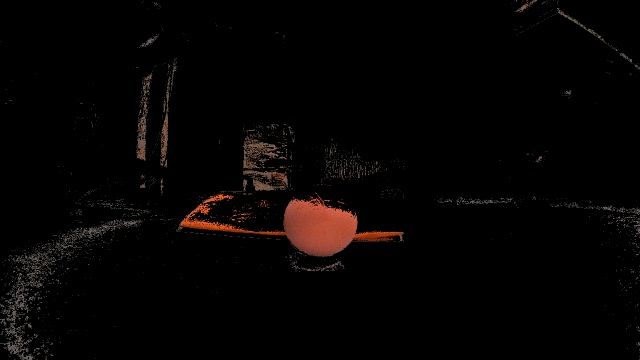

In [ ]:
import cv2
import kachaka_api
import numpy as np
from IPython.display import Image, clear_output, display

client = kachaka_api.aio.KachakaApiClient()

async for image in client.front_camera_ros_compressed_image.stream():
    cv_image = cv2.imdecode(np.frombuffer(image.data, dtype=np.uint8), flags=1)
    lower_red = np.array([0, 0, 100])
    upper_red = np.array([100, 100, 255])

    mask = cv2.inRange(cv_image, lower_red, upper_red)
    red_objects = cv2.bitwise_and(cv_image, cv_image, mask=mask)

    _, ret = cv2.imencode(".jpg",
        cv2.resize(red_objects, (int(cv_image.shape[1] / 2), int(cv_image.shape[0] / 2))),
    )
    clear_output(wait=True)
    display(Image(data=ret, format="jpeg"))